In [1]:
import pm4py

In [161]:
import pandas as pd
import numpy as np
import pm4py
import os

path_loan = "C:/Users/harleenkaur/Documents/thesis/event logs/Artificial - Loan Process.xes"
log = pm4py.read_xes(path_loan)
print(f" Type of the file that is read : {type(log)}")
print(f" Length of the file that is read : {len(log)}")

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

 Type of the file that is read : <class 'pandas.core.frame.DataFrame'>
 Length of the file that is read : 590


In [3]:
log.head()

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0


In [4]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'register application': 100}
End activities: {'send decision e-mail': 100}


In [20]:
dfg, start_activities, end_activities = pm4py.discover_dfg_typed(log) 
for item, key in dfg.items():
    print(item, key)


('accept', 'send decision e-mail') 20
('calculate capacity', 'accept') 13
('calculate capacity', 'check credit') 6
('calculate capacity', 'check system') 46
('calculate capacity', 'reject') 35
('check credit', 'accept') 1
('check credit', 'calculate capacity') 54
('check credit', 'check system') 38
('check credit', 'reject') 7
('check system', 'accept') 6
('check system', 'calculate capacity') 42
('check system', 'check credit') 4
('check system', 'reject') 38
('register application', 'calculate capacity') 4
('register application', 'check credit') 90
('register application', 'check system') 6
('reject', 'send decision e-mail') 80


## Visualising the DFG

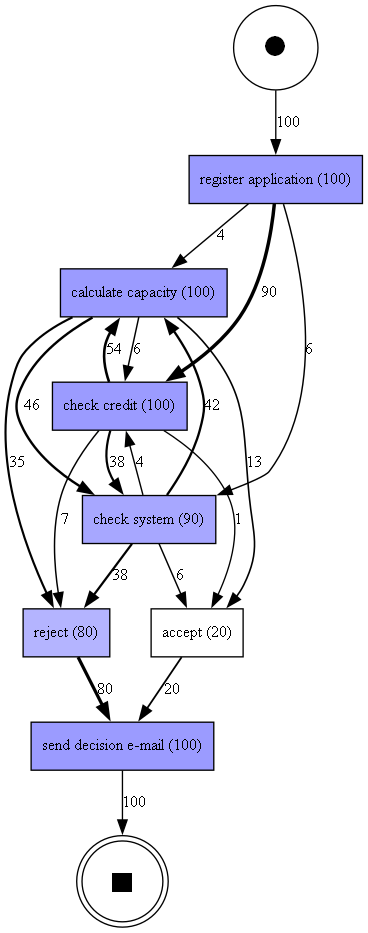

In [21]:
#pm4py.vis.view_dfg(dfg, start_activities, end_activities)  
pm4py.view_dfg(dfg,start_activities, end_activities)

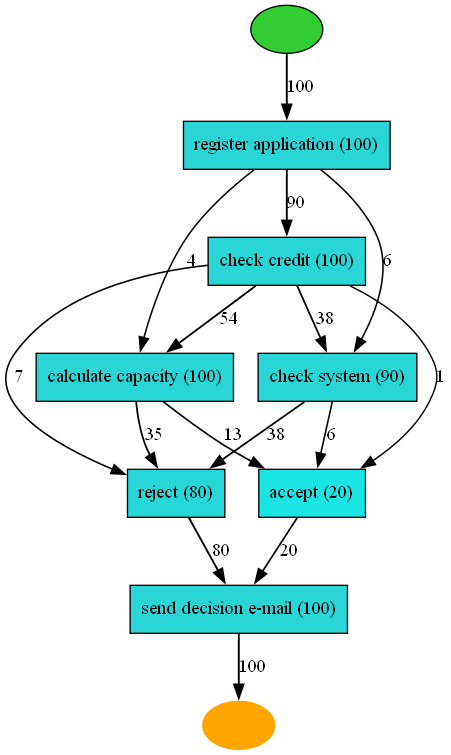

In [41]:
map = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(map)

## Calculate average time between start_event and end_event for trace 0

In [154]:
log[:7]

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0
5,2013-04-16 10:26:53.166000+02:00,send decision e-mail,complete,trace 0
6,2013-04-16 10:10:01.759000+02:00,register application,complete,trace 1


In [91]:
trace0 = log[log['case:concept:name'] == 'trace 0']
trace0

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0
5,2013-04-16 10:26:53.166000+02:00,send decision e-mail,complete,trace 0


In [54]:
from datetime import datetime

In [153]:
dt = datetime.strptime('2013-04-16 10:10:01.759000+02:00', "%Y-%m-%d %H:%M:%S.%f%z")
date = dt.date()
time = dt.time()
time

datetime.time(10, 10, 1, 759000)

In [141]:
#get the start activity's name from start_activites dictionary 
start_activity =""
for key, value in start_activities.items():
    start_activity = key
#print(start_activity)

#get the date and time of the start activity 
preprocess = trace0[trace0['concept:name'] == start_activity]
start_dt_string = str(preprocess['time:timestamp'].iloc[0])
print(start_dt_string)

#convert the value from df to datetime 
start_dt =  datetime.strptime(start_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
start_dt_time = start_dt.time()
start_dt_time 


#get the date and time of end activity 
#get the start activity's name from start_activites dictionary 
end_activity =""
for key, value in end_activities.items():
    end_activity = key
#print(end_activity)

#get the date and time of the end activity 
preprocess = trace0[trace0['concept:name'] == end_activity]
end_dt_string = str(preprocess['time:timestamp'].iloc[0])
print(end_dt_string)

#convert the value from df to datetime 
end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
end_dt_time = end_dt.time()
end_dt_time

2013-04-16 10:08:01.821000+02:00
2013-04-16 10:26:53.166000+02:00


datetime.time(10, 26, 53, 166000)

In [152]:
#calculate delta time of a case
#from datetime import timedelta
timedelta = end_dt - start_dt
minutes = timedelta.seconds / 60
minutes

18.85

## Calculate average time between start_event and end_event for all cases

In [155]:
log.head()

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0


Get the total number of cases first. Then loop through each case and find the time delta of that case. Keep appending the time delta of the case to a list. At the end of the loop, calculate the average time duration taken by the activities from start to end. 

In [166]:
all_cases = np.unique(log['case:concept:name'])
total_number_of_cases = len(set(log['case:concept:name']))

For each case, create a subset DataFrame having only that particular concept name 

In [185]:
time_delta_list = []
for case in all_cases:
    current_trace =  log[log['case:concept:name'] == case]
#    print(current_trace)
    
    #calculate the time delta
    #get the start activity's name from start_activites dictionary 
    start_activity =""
    for key, value in start_activities.items():
        start_activity = key
    #print(start_activity)

    #get the date and time of the start activity 
    preprocess = current_trace[current_trace['concept:name'] == start_activity]
    start_dt_string = str(preprocess['time:timestamp'].iloc[0])
    #print(start_dt_string)

    #convert the value from df to datetime 
    start_dt =  datetime.strptime(start_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
    start_dt_time = start_dt.time()
    start_dt_time 


    #get the date and time of end activity 
    #get the start activity's name from start_activites dictionary 
    end_activity =""
    for key, value in end_activities.items():
        end_activity = key
    #print(end_activity)

    #get the date and time of the end activity 
    preprocess = current_trace[current_trace['concept:name'] == end_activity]
    end_dt_string = str(preprocess['time:timestamp'].iloc[0])
    #print(end_dt_string)

    #convert the value from df to datetime 
    try:
        end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
        end_dt_time = end_dt.time()
    except:
        #print(current_trace)
        #print('there is an error')
        end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S%z")
        end_dt_time = end_dt.time()
        #print(end_dt_time)
        
        
    #calculate delta time of a case
    #from datetime import timedelta
    timedelta = end_dt - start_dt
    minutes = timedelta.seconds / 60
    minutes
    
    #append the timedelta minutes to list
    time_delta_list.append(timedelta)

In [206]:
#time_delta_list

In [211]:
#sum all seconds and microseconds in time_delta_list
sum_time = 0
for element in time_delta_list:
    microsecond_to_second = element.microseconds / 1000000
    seconds_plus_microseconds = element.seconds + microsecond_to_second
    sum_time += seconds_plus_microseconds
    #print(seconds_plus_microseconds)

#take the average
print(sum_time)
average_start_end = sum_time / total_number_of_cases 
average_start_end_minutes = average_start_end / 60 
average_start_end_minutes

145443.65900000004


24.24060983333334